# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [57]:
# student details 1: Tomer Golan 3540
# student details 2: Shahar Rushetzky 0469
# student details 3: Shalev Atsis 6961

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: OpenAI ChatGPT

Goal: Exlpain Titanic Dataset and Learning Problem

Propmpt1: The dataset we chose is the well-known Titanic dataset.
I will write the features of the dataset, and you will create a single descriptive paragraph that best describes the dataset.
In our assignment, we need to analyze the Titanic dataset and perform a comprehensive machine learning flow.
Please describe, in a single paragraph, the learning problem related to this dataset.
    
Propmpt2: I have a Titanic dataset in CSV format. Can you help me write Python code to load the data using pandas, check for missing values, and create a new feature called 'FamilySize' that is the sum of 'SibSp', 'Parch', and 1? Also, show how to create an 'AgeCategory' column that bins ages into child, teenager, young adult, adult, and senior.
    
Propmpt3: I want to visualize the relationship between the new 'AgeCategory' feature and survival in the Titanic dataset. Can you give me Python code (using seaborn or matplotlib) to plot the distribution of 'AgeCategory' for passengers who survived versus those who didn’t?


AI agent name 2: Grok
Goal: understanding machine learning classification models.

Propmpt1: I need to compare a few classifiers on the Titanic data. Can you give me code to train KNN, Decision Tree, and Naive Bayes models, and print out their accuracy scores on the test set? Assume I’ve already split the data and handled missing values.
    
Propmpt2: How do I use GridSearchCV in scikit-learn to find the best hyperparameters for a KNeighborsClassifier and a DecisionTreeClassifier on the Titanic dataset? Please include example parameter grids, the grid search process, and how to display the best parameters and evaluation metrics for each model.
    
Propmpt3: What’s the best way to do hyperparameter tuning for KNN and Decision Tree using GridSearchCV? I want to see how to set up the parameter grids and get the best parameters and scores for each model. Can you give me a full example?

Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
The Titanic dataset contains detailed information about each passenger aboard the historic ship, with each row representing a unique individual. The dataset includes features such as Passenger ID, travel class (Pclass), gender (Sex), age (Age), number of siblings or spouses aboard (SibSp), number of parents or children aboard (Parch), ticket number (Ticket), fare paid (Fare), and port of embarkation (Embarked). The main target variable, 'Survived', indicates whether the passenger survived the disaster or not. These features provide a basis for statistical analysis and machine learning, aiming to predict survival outcomes based on personal and situational characteristics.

The learning problem in the Titanic dataset is a classic binary classification task, where the goal is to predict whether a passenger survived the disaster or not, based on a variety of personal and travel-related features. By analyzing factors such as class, gender, age, family relations aboard, fare, and embarkation point, we aim to develop a machine learning model that can accurately estimate the likelihood of survival for each passenger. This problem serves as a fundamental example of supervised learning, where the outcome ('Survived') is known and models are trained to generalize predictions to new, unseen data.
</pre>

## Part 2 - Initial Preparations 

### Part 2(a) - Loading the dataset 


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer

In [59]:
# Function to load a dataset from a CSV file
def load_dataset(file_name):
    df = pd.read_csv(file_name)  # Read the CSV file into a DataFrame
    return df  # Return the loaded DataFrame

In [60]:
# Load the train set and display its shape and first 5 rows
trainset = load_dataset("titanic_train.csv")  # Load the training data
print(trainset.shape)  # Print the shape of the DataFrame
trainset.head()  # Display the first 5 rows of the DataFrame

(712, 8)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


In [61]:
# Load the test set and display its shape and first 5 rows
testset = load_dataset("titanic_test.csv")  # Load the test data
print(testset.shape)  # Print the shape of the DataFrame
testset.head()  # Display the first 5 rows of the DataFrame

(179, 8)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


### Part 2(b) - EDA 


In [62]:
# First table visualization 
# Displaying the summary information of the Titanic training set, including the number of entries, feature types, and missing values.
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
 7   Survived  712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 44.6 KB


In [63]:
# Second table visualization
# Presenting the statistical summary of the numerical features in the Titanic training set, including measures such as mean, standard deviation, and range.
trainset.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.294944,0.640449,29.531213,0.528090,0.384831,32.379429,0.372191,0.394663
std,0.841990,0.480206,13.188028,1.055052,0.803085,49.836074,0.649970,0.489122
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.500000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


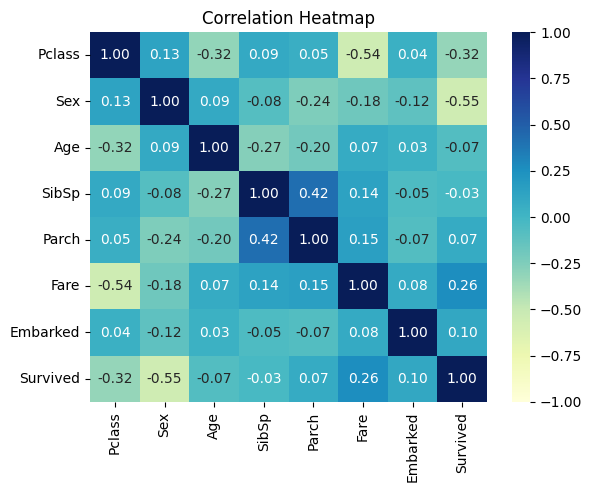

In [64]:
# First graph visualization
# This heatmap visualizes the correlation coefficients between the numerical features in the dataset, highlighting the strength and direction of linear relationships between different variables.
# It helps identify which features are strongly related to each other and to the target variable.

corr_matrix = trainset.corr()
plt.figure()
sns.heatmap(corr_matrix, annot=True, fmt='.2f',cmap='YlGnBu', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

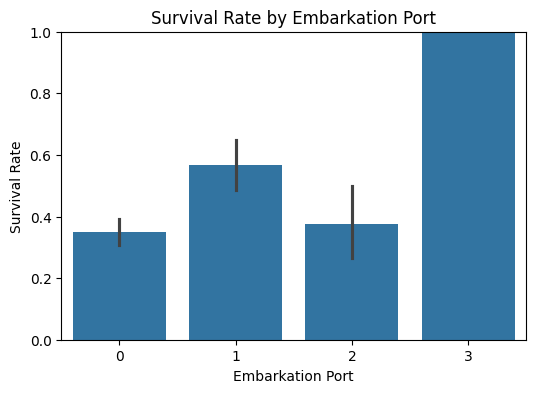

In [65]:
# Second graph visualization
# This bar plot displays the average survival rate of passengers for each embarkation port, allowing easy comparison of survival likelihoods based on where passengers boarded the ship.

plt.figure(figsize=(6,4))
sns.barplot(x='Embarked', y='Survived', data=trainset)
plt.title('Survival Rate by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()


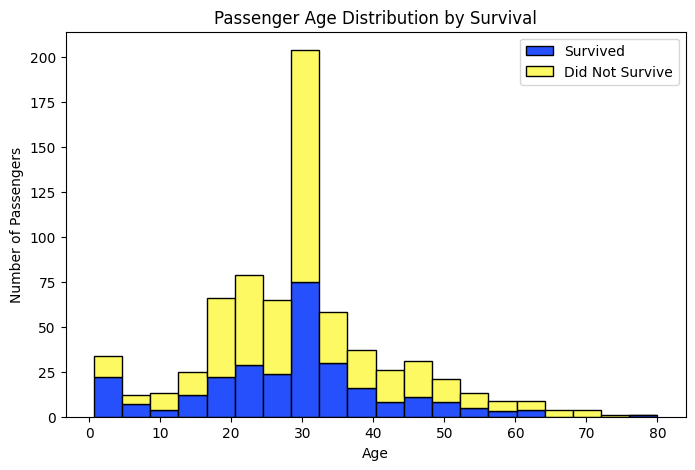

In [66]:
# Third graph visualization
# This stacked histogram compares the age distributions of passengers who survived and those who did not, revealing how survival rates varied across different age groups.

plt.figure(figsize=(8,5))
plt.hist(
    [trainset[trainset['Survived'] == 1]['Age'].dropna(), trainset[trainset['Survived'] == 0]['Age'].dropna()],
    bins=20,
    stacked=True,
    label=['Survived', 'Did Not Survive'],
    color=['#2650fc', '#fcf962'],
    edgecolor='black'
)
plt.title('Passenger Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


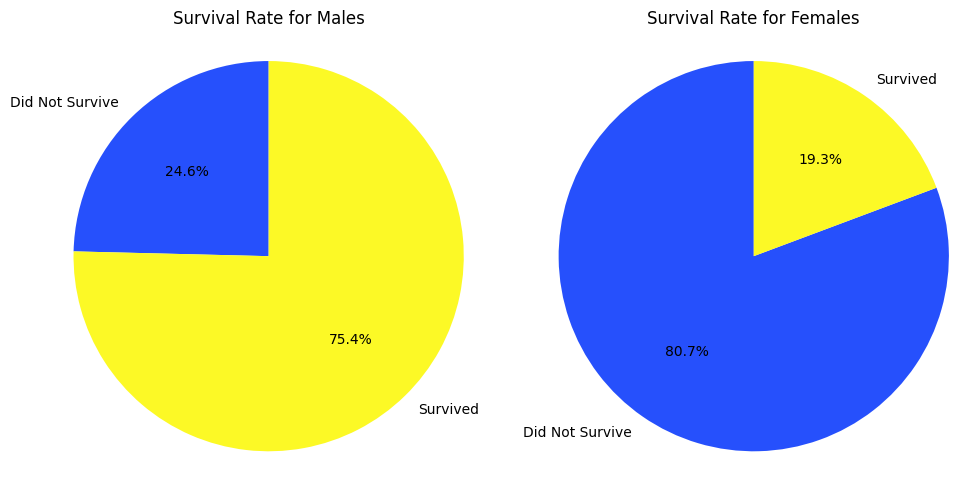

In [67]:
# Fourth graph visualization
# These two pie charts display the proportion of survivors and non-survivors within each gender group, making it easy to compare survival rates between male and female passengers.

sex_labels = {0: 'Male', 1: 'Female'}

fig, axes = plt.subplots(1, 2, figsize=(10,5))

for idx, (sex_value, sex_name) in enumerate(sex_labels.items()):
    gender_data = trainset[trainset['Sex'] == sex_value]
    counts = gender_data['Survived'].value_counts().sort_index()
    labels = ['Did Not Survive', 'Survived']
    axes[idx].pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#2650fc', '#fcf926'])
    axes[idx].set_title(f'Survival Rate for {sex_name}s')
    axes[idx].axis('equal')

plt.tight_layout()
plt.show()


## Part 3 - Experiments

### Feature engineering experiments

In [68]:
# Check for missing values in the train and test sets
missing_vals_train = trainset.isnull().sum()  # Count missing values in each column of the train set
missing_vals_test = testset.isnull().sum()    # Count missing values in each column of the test set

print(missing_vals_train)  # Print missing values for train set
print('\n')
print(missing_vals_test)   # Print missing values for test set

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64


In [69]:
# Add a new feature 'FamilySize' to the train set
trainset['FamilySize'] = trainset['SibSp'] + trainset['Parch'] + 1  # Family size = siblings/spouses + parents/children + self
trainset.head()  # Display the first 5 rows to check the new feature

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,FamilySize
0,1,0,54.0,1,0,78.2667,1,1,2
1,2,0,45.0,0,0,13.5000,0,1,1
2,3,1,20.0,0,0,9.5000,0,0,1
3,3,1,36.0,0,0,7.8958,0,0,1
4,3,1,22.0,0,0,8.0500,0,0,1


In [70]:
# Add a new feature 'FamilySize' to the test set
testset['FamilySize'] = testset['SibSp'] + testset['Parch'] + 1  # Same calculation as for train set
testset.head()  # Display the first 5 rows to check the new feature

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,FamilySize
0,3,1,35.000000,0,0,7.0500,0,0,1
1,3,1,30.000000,0,0,7.2500,0,0,1
2,3,1,29.699118,0,0,14.5000,0,0,1
3,3,0,21.000000,0,0,7.7500,2,0,1
4,3,1,32.000000,0,0,56.4958,0,1,1


In [71]:
# Create age categories for the train set
bins = [0, 12, 18, 30, 50, 200]  # Define age category boundaries
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']  # Define labels for each age category
trainset['AgeCategory'] = pd.cut(trainset['Age'], bins=bins, labels=labels)  # Create the new column

# Map category labels to numeric codes
category_mapping = {'Child': 1, 'Teenager': 2, 'Young Adult': 3, 'Adult': 4, 'Senior': 5}
trainset['AgeCategory'] = trainset['AgeCategory'].map(category_mapping)  # Apply mapping
trainset.head()  # Display the first 5 rows to check the new feature

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,FamilySize,AgeCategory
0,1,0,54.0,1,0,78.2667,1,1,2,5
1,2,0,45.0,0,0,13.5000,0,1,1,4
2,3,1,20.0,0,0,9.5000,0,0,1,3
3,3,1,36.0,0,0,7.8958,0,0,1,4
4,3,1,22.0,0,0,8.0500,0,0,1,3


In [72]:
# Create age categories for the test set
bins = [0, 12, 18, 30, 50, 200]  # Define age category boundaries
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']  # Define labels for each age category
testset['AgeCategory'] = pd.cut(testset['Age'], bins=bins, labels=labels)  # Create the new column

# Map category labels to numeric codes
category_mapping = {'Child': 1, 'Teenager': 2, 'Young Adult': 3, 'Adult': 4, 'Senior': 5}
testset['AgeCategory'] = testset['AgeCategory'].map(category_mapping)  # Apply mapping
testset.head()  # Display the first 5 rows to check the new feature

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,FamilySize,AgeCategory
0,3,1,35.000000,0,0,7.0500,0,0,1,4
1,3,1,30.000000,0,0,7.2500,0,0,1,3
2,3,1,29.699118,0,0,14.5000,0,0,1,3
3,3,0,21.000000,0,0,7.7500,2,0,1,3
4,3,1,32.000000,0,0,56.4958,0,1,1,4


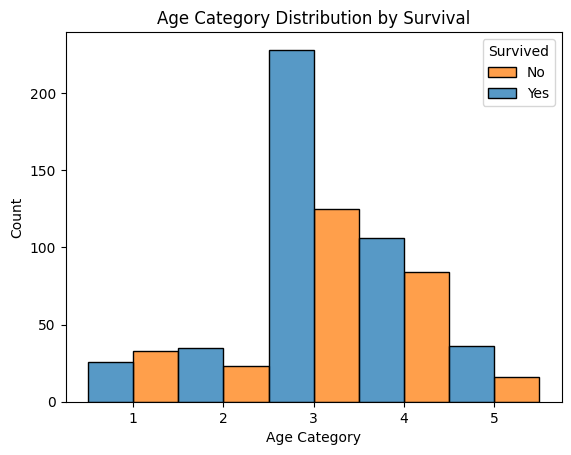

In [73]:
# Plot the distribution of AgeCategory by Survival in the train set
sns.histplot(data=trainset, x='AgeCategory', hue='Survived', multiple='dodge', discrete=True)
plt.title('Age Category Distribution by Survival')  # Set plot title
plt.xlabel('Age Category')  # Set x-axis label
plt.ylabel('Count')         # Set y-axis label
plt.legend(title='Survived', labels=['No', 'Yes'])  # Set legend
plt.show()  # Display the plot

In [74]:
# Initialize the MinMaxScaler for scaling the 'Age' column
scaler = MinMaxScaler()  # Create a scaler object

columns_to_scale = ['Age']   # Specify which columns to scale

# Fit the scaler on the 'Age' column of the train set and transform it
trainset['Age'] = scaler.fit_transform(trainset[['Age']])  # Scale 'Age' in train set

# Also scale the 'Age' column in the test set using the same scaler (fit only on train!)
testset['Age'] = scaler.transform(testset[['Age']])  # Scale 'Age' in test set

# Check the statistics of the scaled 'Age' column to confirm scaling
(trainset['Age']).describe()  # Should show min=0 and max=1

count    712.000000
mean       0.363812
std        0.166243
min        0.000000
25%        0.268877
50%        0.365929
75%        0.432749
max        1.000000
Name: Age, dtype: float64

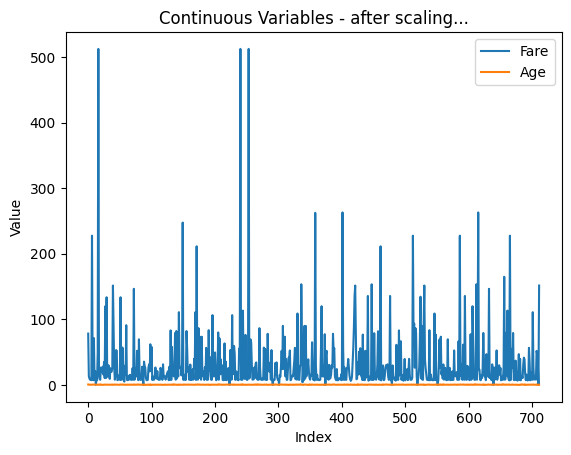

In [75]:
# Plot the scaled continuous variables
continuous_columns = ['Fare', 'Age']   # List of continuous variable columns
trainset[continuous_columns].plot()    # Create a line plot for these columns
plt.xlabel('Index')                    # X-axis label
plt.ylabel('Value')                    # Y-axis label
plt.title('Continuous Variables - after scaling...')  # Plot title
plt.show()                             # Display the plot

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [76]:
# Select features and target for training and testing
X_train = trainset[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']]  # Features for training
y_train = trainset['Survived']  # Target for training

X_test = testset[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']]    # Features for testing
y_test = testset['Survived']    # Target for testing

In [77]:
# Train and predict using the KNN algorithm
knn_model = KNeighborsClassifier(n_neighbors=5)  # Define KNN model with 5 neighbors
knn_model.fit(X_train, y_train)                  # Fit the model on the training set
y_pred = knn_model.predict(X_test)               # Predict on the test set
accuracy = accuracy_score(y_test, y_pred)        # Calculate model accuracy
print("Accuracy of KNN model:", accuracy)        # Print accuracy result

Accuracy of KNN model: 0.8156424581005587


In [78]:
# Train and predict using the Decision Tree algorithm
dt_model = DecisionTreeClassifier()              # Define Decision Tree model
dt_model.fit(X_train, y_train)                   # Fit the model on the training set
y_pred_dt = dt_model.predict(X_test)             # Predict on the test set
accuracy_dt = accuracy_score(y_test, y_pred_dt)  # Calculate model accuracy
print("Accuracy of Decision Tree model:", accuracy_dt)  # Print accuracy result

Accuracy of Decision Tree model: 0.7988826815642458


In [79]:
# Train and predict using the Naive Bayes algorithm
nb_model = GaussianNB()                          # Define Naive Bayes model
nb_model.fit(X_train, y_train)                   # Fit the model on the training set
y_pred_nb = nb_model.predict(X_test)             # Predict on the test set
accuracy_nb = accuracy_score(y_test, y_pred_nb)  # Calculate model accuracy
print("Accuracy of Naive Bayes model:", accuracy_nb)  # Print accuracy result

Accuracy of Naive Bayes model: 0.8100558659217877


In [80]:
# Define hyperparameter grids for KNN and Decision Tree models

# Hyperparameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],                # Number of neighbors to try
    'weights': ['uniform', 'distance'],         # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics to try
}

# Hyperparameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],           # Function to measure the quality of a split
    'max_depth': [None, 10, 20, 30, 40, 50],    # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split
    'min_samples_leaf': [1, 2, 4]               # Minimum number of samples required at a leaf node
}

In [81]:
# Function to run Grid Search and evaluate metrics
def run_grid_search_and_evaluation(X_train, y_train, X_test, y_test, model, param_grid):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')  # Set up grid search
    grid_search.fit(X_train, y_train)  # Fit grid search to training data

    best_model = grid_search.best_estimator_  # Get the best model found by grid search
    best_model.fit(X_train, y_train)          # Fit the best model on the training data

    y_pred = best_model.predict(X_test)       # Predict on the test set

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Return results as a dictionary
    return {
        'Model': model.__class__.__name__,
        'Best Parameters': grid_search.best_params_,
        'Best CV Accuracy': grid_search.best_score_,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

In [82]:
# List to store results
results = []

# List of models to evaluate with their parameter grids
models = [
    ('KNN', KNeighborsClassifier(), param_grid_knn),
    ('Decision Tree', DecisionTreeClassifier(), param_grid_dt)
]

# Run Grid Search and calculate metrics for each model
for name, model, param_grid in models:
    result = run_grid_search_and_evaluation(X_train, y_train, X_test, y_test, model, param_grid)
    results.append(result)

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results)
results_df   # Display the final results table

,Model,Best Parameters,Best CV Accuracy,Accuracy,Precision,Recall,F1 Score
0,KNeighborsClassifier,"{'metric': 'manhattan', 'n_neighbors': 5, 'wei...",0.779504,0.798883,0.711864,0.688525,0.700000
1,DecisionTreeClassifier,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.797754,0.815642,0.791667,0.622951,0.697248


In [83]:
# Define the best model as a pipeline with preprocessing and classifier
best_model = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', SimpleImputer(strategy='mean'), ['Age', 'Fare']),  # Impute missing values in numeric columns
            ('cat', SimpleImputer(strategy='most_frequent'), ['Sex']), # Impute missing values in categorical columns
        ],
        remainder='passthrough'  # Leave other columns unchanged
    )),
    ('classifier', DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=2, min_samples_leaf=1))
])

best_model.fit(X_train, y_train)  # Fit the best model pipeline on the training data

# Predict and evaluate model performance on the test set
y_pred = best_model.predict(X_test)  # Predict on the test set

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics for the Best Decision Tree Model:\n")
print(f"Accuracy on test set: {accuracy}")
print(f"Precision on test set: {precision}")
print(f"Recall on test set: {recall}")
print(f"F1 Score on test set: {f1}")

Evaluation Metrics for the Best Decision Tree Model:

Accuracy on test set: 0.7821229050279329
Precision on test set: 0.7391304347826086
Recall on test set: 0.5573770491803278
F1 Score on test set: 0.6355140186915887


## Part 5 - Apply on test and show model performance estimation

In [84]:
# Apply the best model on the test set and show performance estimation

# (Optional) Transform the test set using the pipeline's preprocessor
X_test_processed = best_model.named_steps['preprocessor'].transform(X_test)

y_pred_test = best_model.predict(X_test)  # Predict on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)  # Calculate accuracy on the test set

# Create a DataFrame with predictions and actual values
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test
})

print("\nAdditional prediction results:")
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('\n')
print("Prediction results and model accuracy on the test set:\n")
print("Predictions vs. Actuals on Test Set:")
results_df.head(30)  # Show the first 30 predictions vs. actuals


Additional prediction results:
Precision: 0.7391304347826086
Recall: 0.5573770491803278
F1 Score: 0.6355140186915887


Prediction results and model accuracy on the test set:

Predictions vs. Actuals on Test Set:


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,1
4,1,1
5,1,0
6,0,0
7,0,0
8,1,1
9,0,0
